## SALES PREDICTION.

In [3]:
# importing core libraries
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# loading dataset
df = pd.read_csv(r"C:\Users\SOMYA SUDEEPTA ORAM\Desktop\codesoft\sales\advertising.csv")
print("Dataset Shape:", df.shape)

Dataset Shape: (200, 4)


In [6]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [13]:
print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [14]:
# Exploratory Data Analysis

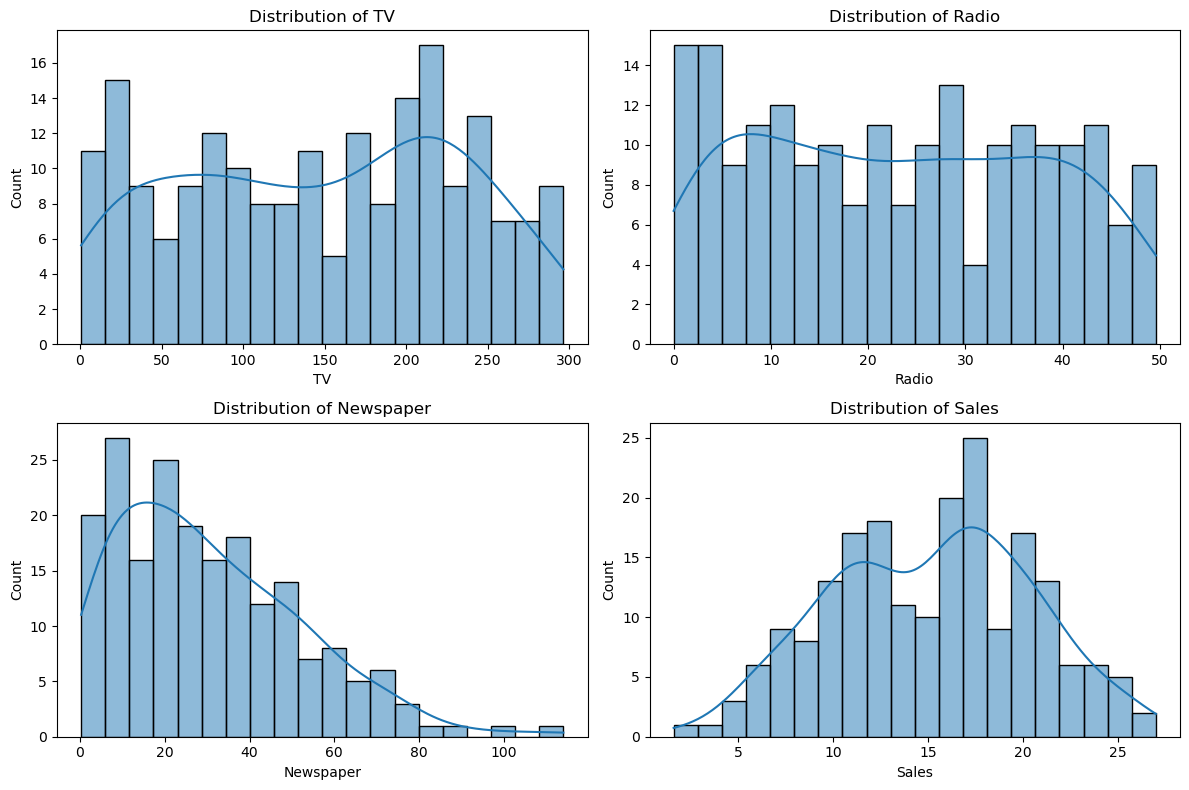

In [15]:
# Distribution of Each Variable
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

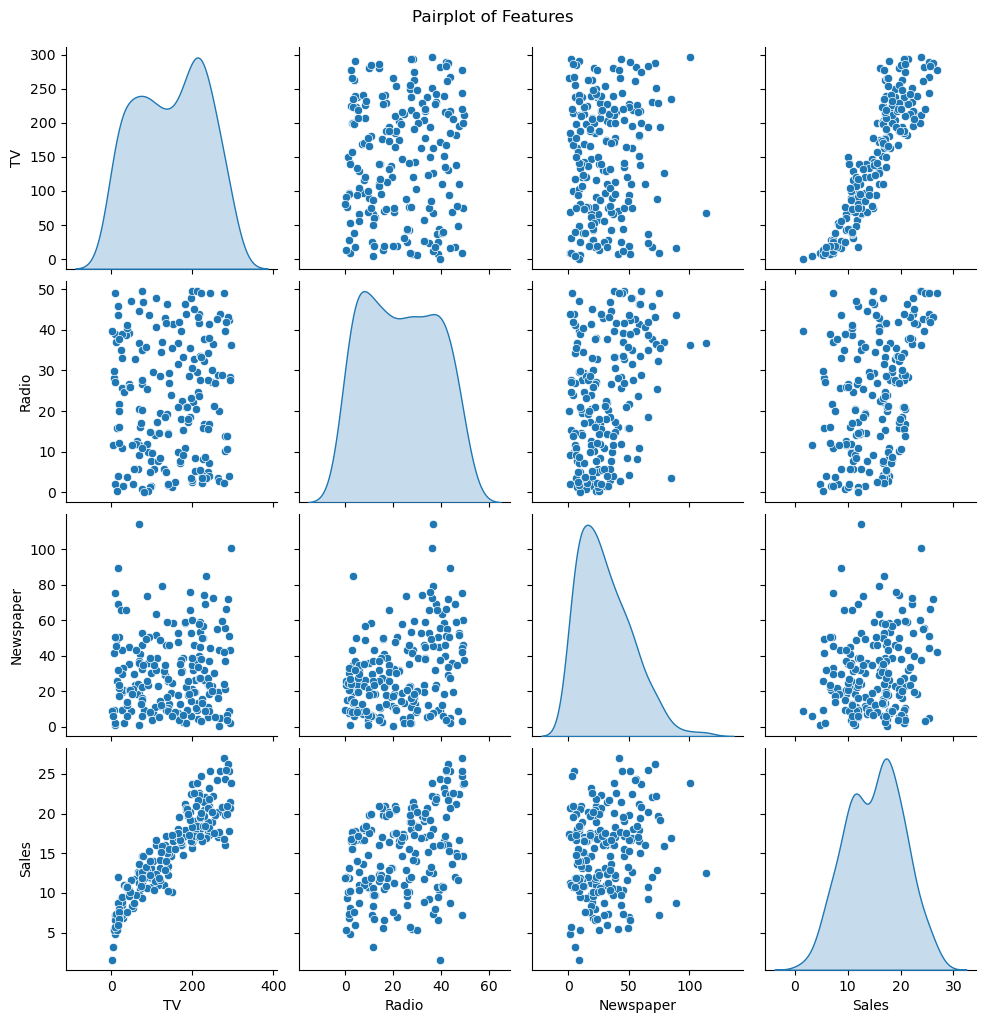

In [17]:
# Pairplot
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

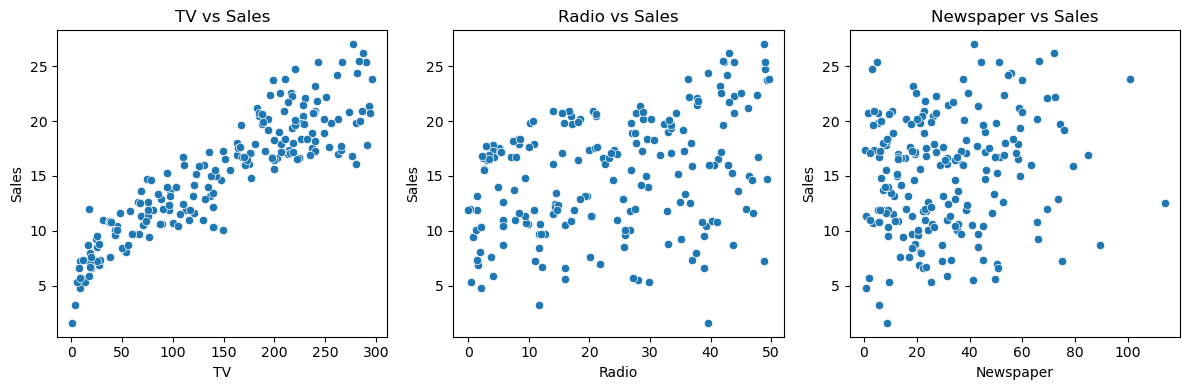

In [18]:
# Scatterplots: Features vs Sales
plt.figure(figsize=(12,4))
for i, col in enumerate(["TV", "Radio", "Newspaper"], 1):
    plt.subplot(1,3,i)
    sns.scatterplot(x=df[col], y=df["Sales"])
    plt.title(f"{col} vs Sales")
plt.tight_layout()
plt.show()

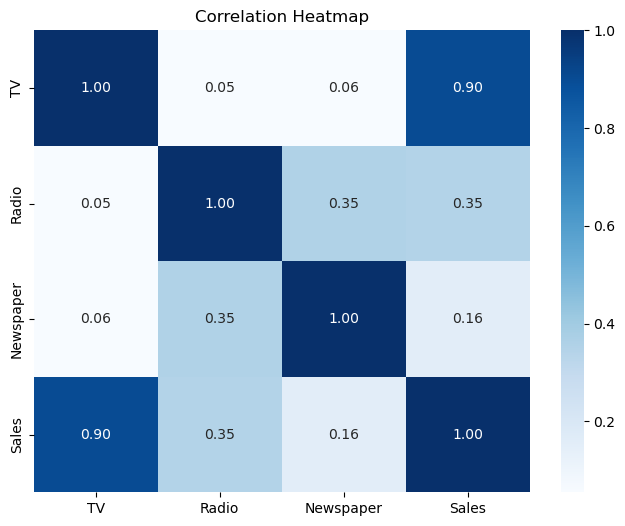

In [22]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Preparing features and target
x = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

In [24]:
# Input data
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [25]:
# Output data
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [26]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("\nTraining set size:", x_train.shape)
print("Testing set size:", x_test.shape)


Training set size: (160, 3)
Testing set size: (40, 3)


In [27]:
# Feature Scaling for Linear Regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [37]:
# Model Training (Regression Problem, since our output 'Sales' is continuous.)

In [29]:
# Linear Regression Model (Scaled)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)

In [30]:
print("\nLinear Regression Performance:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression Performance:
R2 Score: 0.9059011844150826
RMSE: 1.7052146229349232
MAE: 1.2748262109549344


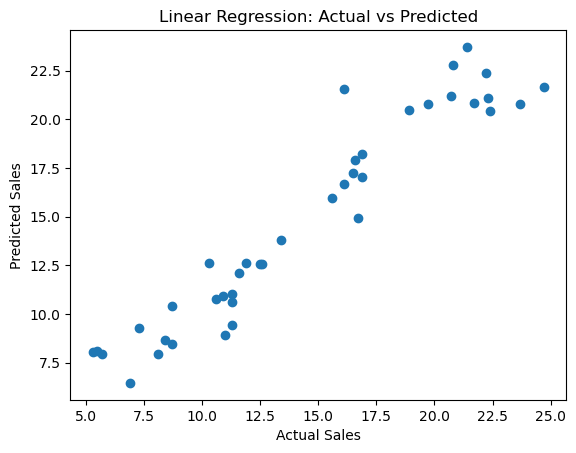

In [31]:
# Plot Predictions vs Actual
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [32]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)   # RF handles unscaled data well
y_pred_rf = rf.predict(x_test)

In [33]:
print("\nRandom Forest Performance:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest Performance:
R2 Score: 0.9534827934927883
RMSE: 1.1989298770153327
MAE: 0.9179999999999993


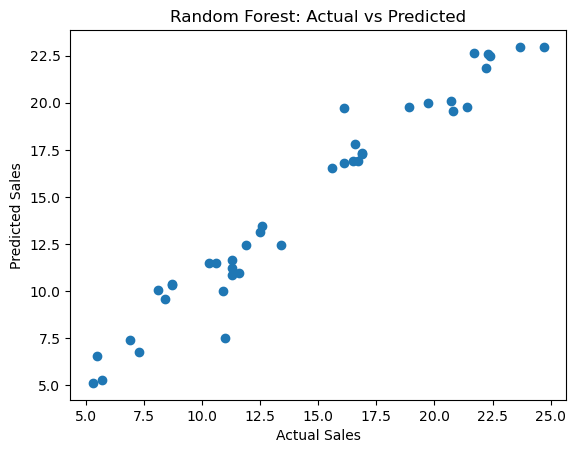

In [34]:
# Plot Predictions vs Actual
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

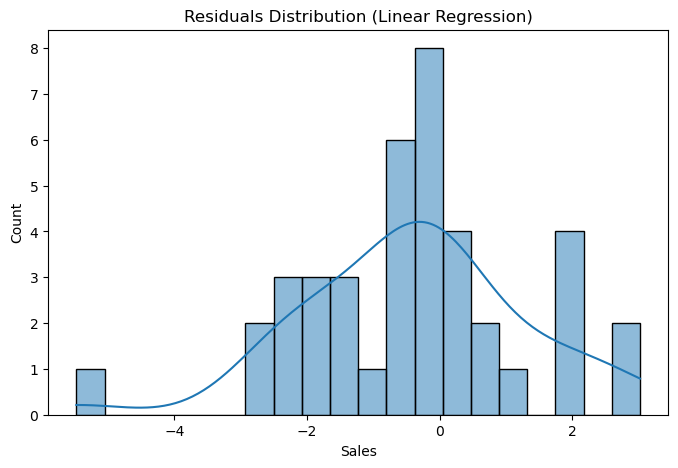

In [35]:
# Residual Analysis
residuals = y_test - y_pred_lr

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Residuals Distribution (Linear Regression)")
plt.show()

In [36]:
# Saving the Best Model
import joblib
joblib.dump(lr, "linear_regression_model.pkl")
joblib.dump(rf, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\nModels and scaler saved successfully!")


Models and scaler saved successfully!
